<a href="https://colab.research.google.com/github/ASMAAAIT/detecting_terrorist/blob/main/detecting_terrorist_on_social_media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load and Explore the Data**

In [1]:
import pandas as pd

# Load the dataset, specifying the encoding (e.g., 'latin-1' or 'ISO-8859-1')
data = pd.read_csv('comment.csv', encoding='latin-1')
# Inspect the structure of the data
print(data.info())  # Provides column names, data types, and non-null counts
print(data.head())  # Displays the first few rows of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Post_Title      3501 non-null   object
 1   Post_Author     3501 non-null   object
 2   Post_URL        3501 non-null   object
 3   Comment_Author  2998 non-null   object
 4   Comment_Body    3501 non-null   object
 5   Comment_Score   3501 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 164.2+ KB
None
                                  Post_Title      Post_Author  \
0  An Islamic Caliphate in the modern era ?   Capitaine_snake   
1  An Islamic Caliphate in the modern era ?   Capitaine_snake   
2  An Islamic Caliphate in the modern era ?   Capitaine_snake   
3  An Islamic Caliphate in the modern era ?   Capitaine_snake   
4  An Islamic Caliphate in the modern era ?   Capitaine_snake   

                                            Post_URL        Comment_Author  \
0  https://www.r

In [2]:
!pip install chardet
import chardet

with open('comment.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])  # This will print the detected encoding

Windows-1252


the **chardet** library to detect the character encoding of a file, which is particularly useful when working with files that may not use a standard encoding like UTF-8.

**2. Text Preprocessing**


In [3]:
import re # for regular expressions, used for text cleaning (e.g., removing punctuation, numbers, etc
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk import download

# Download NLTK resources
download('punkt')
download('stopwords')
download('punkt_tab') # Download the missing 'punkt_tab' data

# Initialize stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Preprocessing function
def preprocess_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords and apply stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Apply preprocessing to the Comment_Body column
data['Cleaned_Comment'] = data['Comment_Body'].apply(preprocess_text)

# Display cleaned data
print(data[['Comment_Body', 'Cleaned_Comment']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                        Comment_Body  \
0  Definitely donÛªt trust the Hadith if it is n...   
1  Too much evidence says it will happen. A commo...   
2  \rThis is a weak hadith because it is mursal (...   
3                               We need a federation   
4                           Can you cite the Hadith?   

                                     Cleaned_Comment  
0  definit donûªt trust hadith sahih caliph moder...  
1  much evid say happen common misconcept cop als...  
2  weak hadith mursal disconnect yunu bin maysara...  
3                                         need feder  
4                                        cite hadith  


Justification:
Cleaning ensures irrelevant information (punctuation, numbers) is removed.
Lowercasing, tokenizing, and removing stopwords simplify text for analysis.
Stemming or lemmatization reduces words to their base forms, minimizing redundancy in text features.


**3. Sentiment Analysis**

In [5]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER Sentiment Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to classify sentiment
def analyze_sentiment(text):
    scores = analyzer.polarity_scores(text) #This method calculates sentiment scores for the input text and returns a dictionary with four key scores: Pos, Neu, Neg
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
data['Sentiment'] = data['Cleaned_Comment'].apply(analyze_sentiment) #new column, Sentiment, is added to store the sentiment classification for each comment

# Display sentiment results
print(data[['Cleaned_Comment', 'Sentiment']].head())


                                     Cleaned_Comment Sentiment
0  definit donûªt trust hadith sahih caliph moder...  Positive
1  much evid say happen common misconcept cop als...   Neutral
2  weak hadith mursal disconnect yunu bin maysara...  Negative
3                                         need feder   Neutral
4                                        cite hadith   Neutral


VADER (Valence Aware Dictionary and sEntiment Reasoner) Sentiment Analyzer is effective for short texts (particularly social media text, comments, tweets).
Classifies sentiment as Positive, Negative, or Neutral based on compound sentiment scores.

**4. Detect Suspicious Language Patterns**


In [8]:
# Define a list of suspicious keywords
suspicious_keywords = ['attack', 'bomb', 'kill', 'hate', 'terror', 'weapon', 'violence']

# Function to flag suspicious comments
def flag_suspicious(text):
    for word in suspicious_keywords:
        if word in text:
            return 1  # Suspicious
    return 0  # Not suspicious

# Apply flagging
data['Suspicious'] = data['Cleaned_Comment'].apply(flag_suspicious)

# Display flagged comments
print(data[['Cleaned_Comment', 'Suspicious']].head())


                                     Cleaned_Comment  Suspicious
0  definit donûªt trust hadith sahih caliph moder...           0
1  much evid say happen common misconcept cop als...           0
2  weak hadith mursal disconnect yunu bin maysara...           0
3                                         need feder           0
4                                        cite hadith           0


A dictionary of suspicious keywords is essential for identifying potential aggression, incitement, or radicalization in comments.
A binary flag (1 for suspicious, 0 otherwise) simplifies later analysis.

**5. Data Visualization**


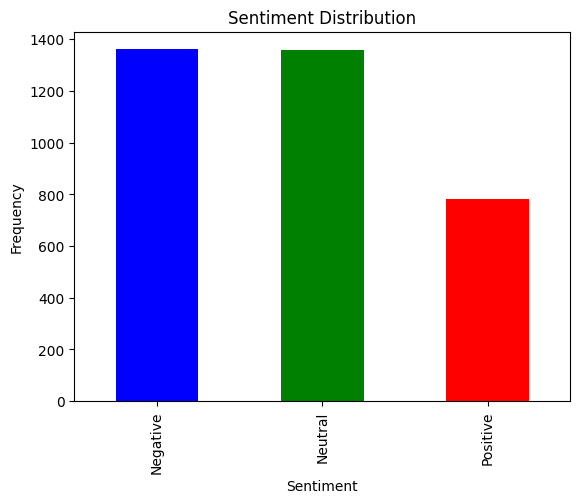

Number of suspicious comments: 689


In [9]:
import matplotlib.pyplot as plt

# Plot sentiment distribution
data['Sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution', color=['blue', 'green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

# Plot suspicious comment count
print("Number of suspicious comments:", data['Suspicious'].sum())


**6. Output Results**


In [10]:
# Save the processed dataset with new columns to a CSV file
data.to_csv('comments.csv', index=False)

# Display summary statistics
print("Processed dataset saved as 'processed_comments.csv'")
print(data[['Sentiment', 'Suspicious']].describe())


Processed dataset saved as 'processed_comments.csv'
        Suspicious
count  3501.000000
mean      0.196801
std       0.397637
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       1.000000


**Customizing Suspicious Keyword Detection**


In [11]:
!pip install fuzzywuzzy[speedup]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.0 MB/s eta 0:00:00


In [12]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Expanded suspicious keywords
suspicious_keywords = [
    'attack', 'bomb', 'kill', 'hate', 'terror', 'violence', 'radical', 'extremism',
    'threat', 'jihad', 'explosive', 'martyr'
]

# Function to flag suspicious comments using fuzzy matching
def flag_suspicious_fuzzy(text, threshold=80):
    for keyword in suspicious_keywords:
        # Check for fuzzy match
        if any(fuzz.ratio(word, keyword) > threshold for word in text.split()):
            return 1  # Suspicious
    return 0  # Not suspicious

# Apply fuzzy flagging
data['Suspicious_Fuzzy'] = data['Cleaned_Comment'].apply(flag_suspicious_fuzzy)

# Display flagged comments with fuzzy logic
print(data[['Cleaned_Comment', 'Suspicious_Fuzzy']].head())


                                     Cleaned_Comment  Suspicious_Fuzzy
0  definit donûªt trust hadith sahih caliph moder...                 0
1  much evid say happen common misconcept cop als...                 0
2  weak hadith mursal disconnect yunu bin maysara...                 0
3                                         need feder                 0
4                                        cite hadith                 0


**Word Cloud: Most Common Words in Suspicious Comments**

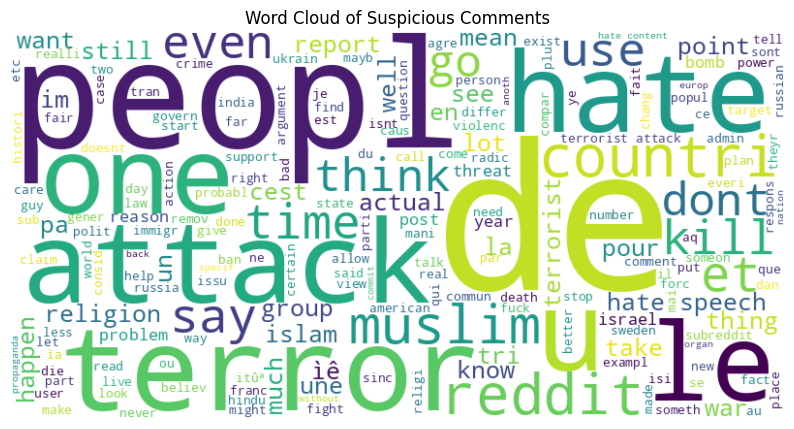

In [15]:
from wordcloud import WordCloud

# Filter suspicious comments
suspicious_comments = data[data['Suspicious_Fuzzy'] == 1]['Cleaned_Comment']

# Combine all suspicious comments into a single string
suspicious_text = ' '.join(suspicious_comments)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(suspicious_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Suspicious Comments')
plt.show()


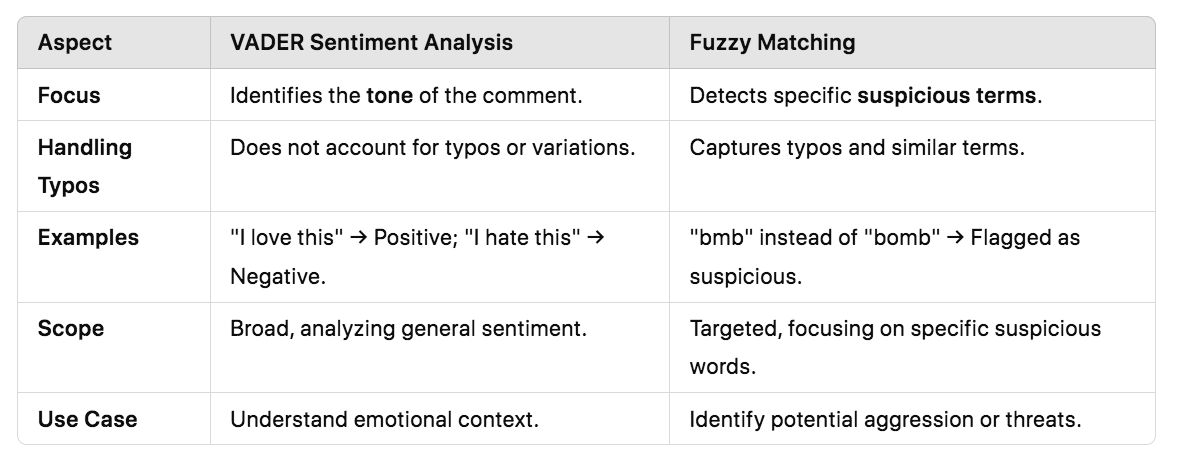

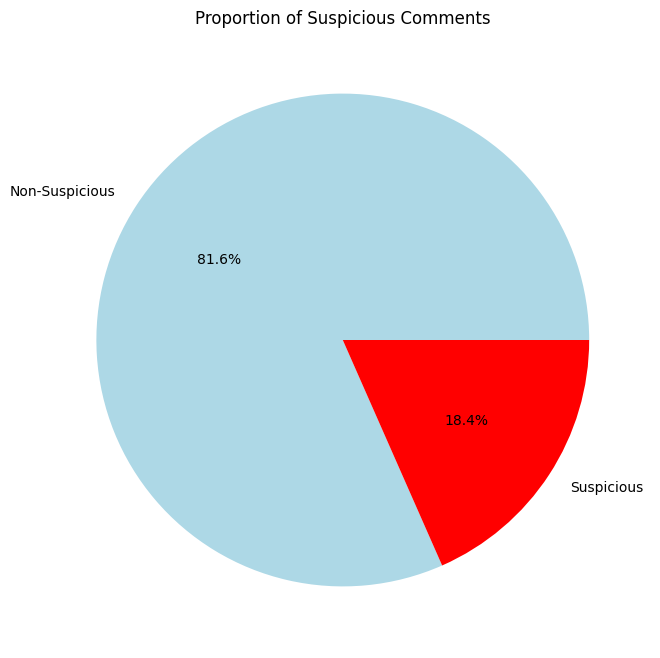

In [16]:
# Calculate the proportion of suspicious and non-suspicious comments
suspicious_proportions = data['Suspicious_Fuzzy'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(suspicious_proportions, labels=['Non-Suspicious', 'Suspicious'], autopct='%1.1f%%', colors=['lightblue', 'red'])
plt.title('Proportion of Suspicious Comments')
plt.show()


**Scaling to Larger Datasets**
For handling large datasets efficiently, use Dask or PySpark to parallelize operations.

In [19]:
pip install pyspark

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col
from pyspark.sql.types import StringType, IntegerType
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize SparkSession
spark = SparkSession.builder \
    .appName("SuspiciousCommentAnalysis") \
    .getOrCreate()

# Load data into Spark DataFrame
data = spark.read.csv('comments.csv', header=True, inferSchema=True)

# Initialize NLTK components and VADER analyzer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
analyzer = SentimentIntensityAnalyzer()

# Preprocessing function
def preprocess_text(text):
    if text is None:
        return ""
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenize
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Sentiment analysis function
def analyze_sentiment(text):
    if text is None:
        return 'Neutral'
    scores = analyzer.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Suspicious keyword flagging function
suspicious_keywords = [
    'attack', 'bomb', 'kill', 'hate', 'terror', 'violence', 'radical',
    'extremism', 'threat', 'jihad', 'explosive', 'martyr'
]

def flag_suspicious(text):
    if text is None:
        return 0
    for keyword in suspicious_keywords:
        if keyword in text:
            return 1  # Suspicious
    return 0  # Not suspicious

# Register UDFs for Spark
preprocess_udf = udf(preprocess_text, StringType())
sentiment_udf = udf(analyze_sentiment, StringType())
suspicious_udf = udf(flag_suspicious, IntegerType())

# Apply transformations
data = data.withColumn('Cleaned_Comment', preprocess_udf(col('Comment_Body')))
data = data.withColumn('Sentiment', sentiment_udf(col('Cleaned_Comment')))
data = data.withColumn('Suspicious', suspicious_udf(col('Cleaned_Comment')))

# Display results
data.select('Comment_Body', 'Cleaned_Comment', 'Sentiment', 'Suspicious').show(10)

# Save results to a new CSV
data.write.csv('processed_comments.csv', header=True)


+--------------------+--------------------+---------+----------+
|        Comment_Body|     Cleaned_Comment|Sentiment|Suspicious|
+--------------------+--------------------+---------+----------+
|Definitely donÛª...|definit donûªt tr...| Positive|         0|
|definit donûªt tr...|definit donûªt tr...| Positive|         0|
|Too much evidence...|much evid say hap...|  Neutral|         0|
|                   "|                    |  Neutral|         0|
| and the _**mursa...|_mursal consid we...| Negative|         0|
|                   0|                    |  Neutral|         0|
|We need a federation|          need feder|  Neutral|         0|
|Can you cite the ...|         cite hadith|  Neutral|         0|
|ôö¯£ôÉ¯¤ ¯¤ôã¯_¯ø...|ôöôé ôã_øô_ç ôãô_...|  Neutral|         0|
|                   0|                    |  Neutral|         0|
+--------------------+--------------------+---------+----------+
only showing top 10 rows



use pre-trained NLP models like BERT for detecting suspicious comments:

**3. Advanced Techniques Using BERT for Semantic Classification**

In [21]:
pip install transformers pyspark


BERT-based models analyze comments for contextual meaning, capturing subtle indicators of aggression or incitement.
Results can be more accurate than keyword matching for complex scenarios.

In [22]:
from transformers import pipeline

# Load a pre-trained sentiment analysis model
nlp_model = pipeline("sentiment-analysis")

def analyze_sentiment_bert(text):
    if text is None:
        return 'Neutral'
    result = nlp_model(text[:512])  # Limit input to 512 tokens
    return result[0]['label']

# Register UDF for BERT
bert_sentiment_udf = udf(analyze_sentiment_bert, StringType())

# Apply BERT-based sentiment analysis
data = data.withColumn('Sentiment_BERT', bert_sentiment_udf(col('Comment_Body')))

# Show results
data.select('Comment_Body', 'Sentiment_BERT').show(10)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


+--------------------+--------------+
|        Comment_Body|Sentiment_BERT|
+--------------------+--------------+
|Definitely donÛª...|      NEGATIVE|
|definit donûªt tr...|      NEGATIVE|
|Too much evidence...|      NEGATIVE|
|                   "|      POSITIVE|
| and the _**mursa...|      NEGATIVE|
|                   0|      NEGATIVE|
|We need a federation|      NEGATIVE|
|Can you cite the ...|      NEGATIVE|
|ôö¯£ôÉ¯¤ ¯¤ôã¯_¯ø...|      NEGATIVE|
|                   0|      NEGATIVE|
+--------------------+--------------+
only showing top 10 rows



**Analyze the Sentiment Distribution**: You can compute the distribution of sentiment labels (positive, negative, neutral) in the Sentiment_BERT column to understand the overall sentiment of the dataset.

In [23]:
data.groupBy('Sentiment_BERT').count().show()

+--------------+-----+
|Sentiment_BERT|count|
+--------------+-----+
|      POSITIVE| 1039|
|      NEGATIVE| 3601|
|       Neutral| 1254|
+--------------+-----+



**Filter Data Based on Sentiment**: If you want to analyze or take action based on specific sentiments, you can filter the DataFrame. For example, you can get all the comments that were classified as positive or negative:

In [24]:
positive_comments = data.filter(data['Sentiment_BERT'] == 'POSITIVE')
negative_comments = data.filter(data['Sentiment_BERT'] == 'NEGATIVE')

**Save or Export the Data**: You can save the results to a file, such as CSV, Parquet, or a database for further analysis or reporting:

**Visualize Sentiment Analysis Results**: You can create visualizations to understand the sentiment distribution better. For example, a bar chart showing the count of each sentiment label:

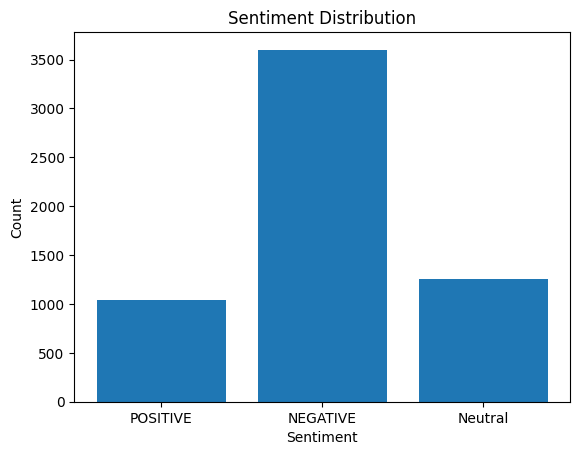

In [30]:
import matplotlib.pyplot as plt

sentiment_counts = data.groupBy('Sentiment_BERT').count().toPandas()
plt.bar(sentiment_counts['Sentiment_BERT'], sentiment_counts['count'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()